# Logistic Regression

## Brynn


In [25]:
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd
import statsmodels.api as sm
import time
from matplotlib import pyplot as plt
from sklearn.svm import SVC

## Problem 1

Create a classifier called `LogiReg` that accepts an $(n \times 1)$ array $y$ of binary labels ($0$'s and $1$'s) as well as an $(n \times d)$ array $X$ of data points. Write a `fit()` method that finds and saves the optimal $\widehat{\boldsymbol{\beta}}$.

## Problem 2

Write a method called `predict_prob()` that accepts an $(n \times d)$ array $x\_test$ and returns $P(Y=1 | x\_test)$. Also write a method called `predict()` that calls `predict_prob()` and returns an array of predicted labels ($0$'s or $1$'s) for the given array $x\_test$.

In [18]:
class LogiReg():
    
    def fit(self, X, y):
        """
        input:
        X: ndarray(n, d)
        y: ndarray(n, 1) taking values only in {0,1}
        
        Save y and X as attributes.
        Updates beta, the coefficient array of shape (d, 1) that
        minimizes the negative log likelihood for the given data 
        with the model p(y|x) = sigm(x^T @ beta).      
        """
        # initialize
        self.n, self.d = X.shape[0], X.shape[1]
        self.y = y
        self.X = np.hstack((np.ones((self.n, 1)), X))

        # fit
        l = lambda β: np.sum(np.array([self.y[i]*np.log(1 + np.exp(-self.X[i] @ β)) + (1 - self.y[i])*np.log(1 + np.exp(self.X[i] @ β)) for i in range(len(self.y))]))
        self.β = minimize(l, np.zeros(self.X.shape[1])).x
    

    def predict_prob(self, x_test):
        """
        Returns the predicted probability of an input x_test.
        If x_test has shape (p, q), then the predicted probability
        has shape (1, q).
        """ 
        x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
        # sigmoid function
        sigmoid = lambda β: 1/(1 + np.exp(-x_test @ β))
        return sigmoid(self.β)
        
    def predict(self, x_test):
        """
        Returns the predicted classification (1 or 0) of x_test.
        If x_test has shape (p, q), then the predicted classification
        has shape (1, q).
        """   
        # make prediction   
        prob_pred = self.predict_prob(x_test)    
        f_hat = np.zeros(prob_pred.shape)
        f_hat[prob_pred >= 0.5] = 1
        
        return f_hat


## Problem 3

Test your classifier from the previous two problems using arrays $X$, $y$, and $X\_test$. Train your classifier on $X$ and $y$. Then generate a list of predicted labels using your trained classifier and $X\_test$, and use it to plot $X\_test$ with a different color for each predicted label.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


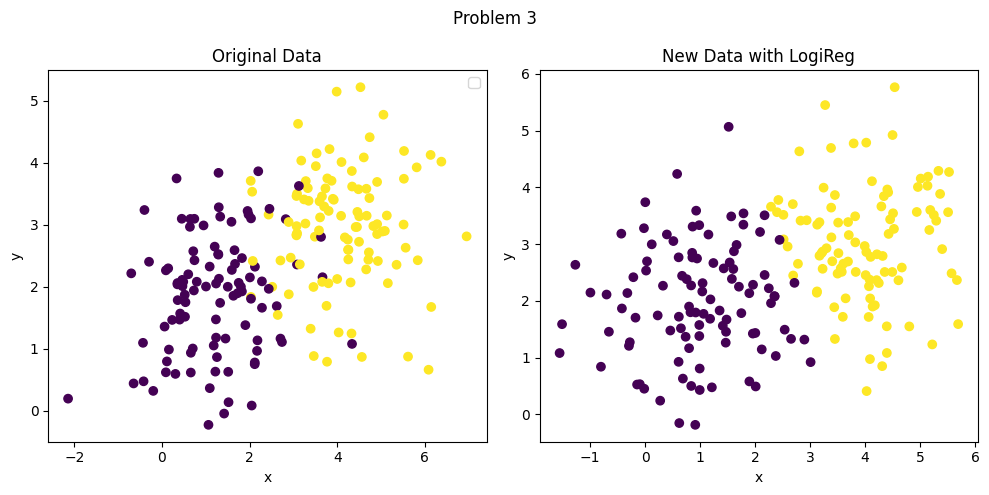

In [19]:
data = np.column_stack(( 
    np.concatenate(( 
        # draw from two 2-dim multivariate normal dist's
        np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
        np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) )), 
    np.concatenate(( np.zeros(100), np.ones(100) )) ))
np.random.shuffle(data)

# extract X and y from the shuffled data
X = data[:,:2]
y = data[:,2].astype(int)

X_test = np.concatenate(( 
    # make a random draw
    np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
    np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) ))
np.random.shuffle(X_test)

# construct model
log_reg = LogiReg()
log_reg.fit(X, y)
pred_y = log_reg.predict(X_test)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title('Original Data')

ax[1].scatter(X_test[:,0], X_test[:,1], c=pred_y)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('New Data with LogiReg')

plt.suptitle('Problem 3')
plt.tight_layout()
plt.show()

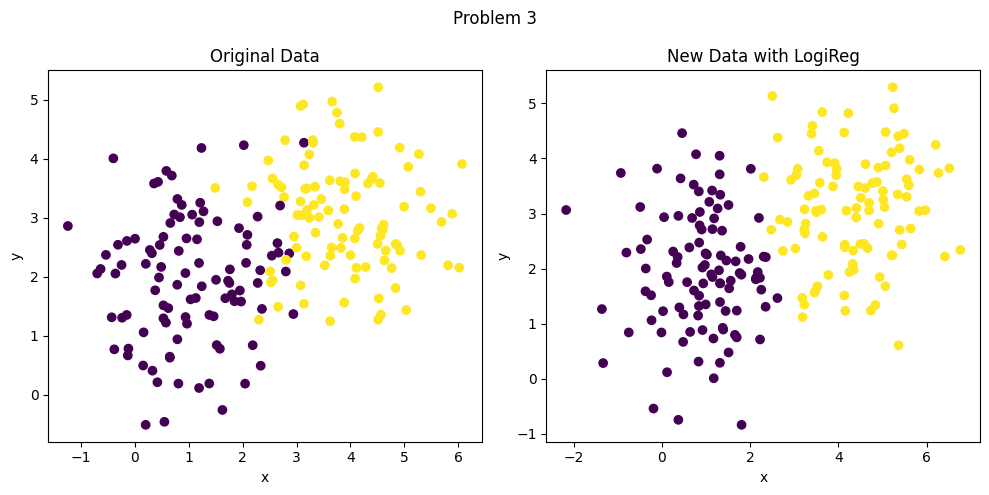

In [9]:
# fit model
log_reg = LogiReg()
log_reg.fit(X, y)
pred_y = log_reg.predict(X_test)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Original Data')

ax[1].scatter(X_test[:,0], X_test[:,1], c=pred_y)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('New Data with LogiReg')

plt.suptitle('Problem 3')
plt.tight_layout()
plt.show()

## Problem 4

Using each of `LogiReg`, `statsmodels.Logit`, `sklearn.LogisticRegression`, and `sklearn.svm` train a logistic regression classifier on $X$ and $y$ to generate a list of predicted labels for $X\_test$. Then, using $y\_test$, print the accuracy scores for each trained model. Compare the accuracies and training/testing time for all three classifiers. Be sure to add a constant feature with each model.

In [34]:
# predefine the true beta
beta = np.random.normal(0, 7, 20)

# X is generated from 2 20-dim. multivariate normal dists.
X = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20)*2, np.eye(20), 100) ))
np.random.shuffle(X)
# create y based on the true beta
pred = 1. / (1. + np.exp(-X @ beta))  
y = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )

# X_test and y_test are generated similar to X and y
X_test = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20), np.eye(20), 100) ))
np.random.shuffle(X_test)
pred = 1. / (1. + np.exp(-X_test @ beta))
y_test = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )

In [40]:
# LogiReg
start = time.time()                 # start timer
log_reg = LogiReg()
log_reg.fit(X, y)
pred_y = log_reg.predict(X_test)    # predict
logireg_time,logireg_acc = time.time()-start, accuracy_score(y_test, pred_y)

# statsmodels.Logit
start = time.time()                 # start timer
X_c = sm.add_constant(X.copy())              # add constants
X_test_c = sm.add_constant(X_test.copy())
model = sm.Logit(y, X_c).fit_regularized()
pred_y_probs = model.predict(X_test_c)      # predict
pred_y_labels = (pred_y_probs >= 0.5).astype(int)
smlogit_time, smlogit_acc = time.time() - start, accuracy_score(y_test, pred_y_labels)

# sklearn.LogisticRegression
start = time.time()                 # start timer
log_reg2 = LogisticRegression(fit_intercept=True)
log_reg2.fit(X, y)
pred_y = log_reg2.predict(X_test)    # predict
sklearn_time, sklearn_acc = time.time()-start, accuracy_score(y_test, pred_y)

# sklearn.svm w/ linear kernel
start = time.time()
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)
pred_y = svm_model.predict(X_test)
svm_time, svm_acc = time.time()-start, accuracy_score(y_test, pred_y)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.3951578587214578e-10
            Iterations: 48
            Function evaluations: 49
            Gradient evaluations: 48


/Users/brynnwoolley/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [41]:
# print
# logireg
print(f'LogiReg Time: {logireg_time}')
print(f'LogiReg Accuracy: {logireg_acc}\n')
#statsmodels.logit
print(f'statsmodels Time: {smlogit_time}')
print(f'statsmodels Accuracy: {smlogit_acc}\n')
#sklearn.LogisticRegression
print(f'sklearn.LogisticRegression Time: {sklearn_time}')
print(f'sklearn.LogisticRegression Accuracy: {sklearn_acc}\n')

print(f'sklearn.svm Time: {svm_time}')
print(f'sklearn.svm Accuracy: {svm_acc}')


LogiReg Time: 1.8836860656738281
LogiReg Accuracy: 0.965

statsmodels Time: 0.020205020904541016
statsmodels Accuracy: 0.955

sklearn.LogisticRegression Time: 0.005450010299682617
sklearn.LogisticRegression Accuracy: 0.96

sklearn.svm Time: 0.0028450489044189453
sklearn.svm Accuracy: 0.965


## Problem 5

Import the Iris Dataset and perform a train-test split on only the first two columns of the data with `test_size=0.4`. Train a multinomial logistic regression model using the training data with an added constant feature, and generate prediction labels for the test data.

Plot the test data by color using your prediction labels. Also, print the model score

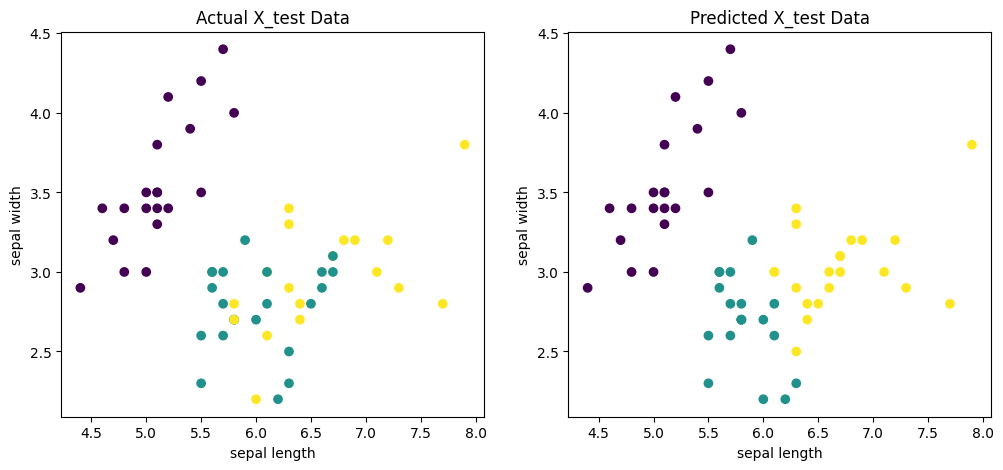

In [44]:
# load & split the data
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.4)

# Train a multinomial logistic regression model
model = LogisticRegression(multi_class = 'multinomial', fit_intercept=True).fit(X_train, y_train)

# predict
pred_y = model.predict(X_test)

# plot
# plot the actual and predicted test data by color using prediction labels
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[0].set_xlabel('sepal length')
ax[0].set_ylabel('sepal width')
ax[0].set_title('Actual X_test Data')

ax[1].scatter(X_test[:,0], X_test[:,1], c=pred_y)
ax[1].set_xlabel('sepal length')
ax[1].set_ylabel('sepal width')
ax[1].set_title('Predicted X_test Data')
plt.show()

In [45]:
print(f'Model Score: { model.score(X_test, y_test)}')

Model Score: 0.8166666666666667
